In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv("cs_table.csv")
df.head()

,Incident_Date,Incident_Type,City,Category,Loss_amt
0,2021-03-11,Ransomware,Ahmedabad,Health,463132
1,2022-04-05,Ransomware,Lucknow,Health,193860
2,2020-02-06,Ransomware,Lucknow,Health,239260
3,2021-03-06,Ransomware,Mumbai,Financial,274680
4,2024-06-26,Ransomware,Chennai,Government,328599


# Data Cleaning and Exploration

In [168]:
df.isna().sum()

Incident_Date    0
Incident_Type    0
City             0
Category         0
Loss_amt         0
dtype: int64

In [169]:
df.shape

(1200, 5)

In [170]:
df.columns

Index(['Incident_Date', 'Incident_Type', 'City', 'Category', 'Loss_amt'], dtype='object')

In [171]:
df.duplicated().sum()

0

In [172]:
df.describe()

,Loss_amt
count,1200.000000
mean,231538.652500
std,138431.719958
min,2969.000000
25%,115619.500000
50%,220486.500000
75%,341963.000000
max,499946.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Incident_Date  1200 non-null   object
 1   Incident_Type  1200 non-null   object
 2   City           1200 non-null   object
 3   Category       1200 non-null   object
 4   Loss_amt       1200 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 47.0+ KB


# Fix Data Type

In [175]:
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Incident_Date  1200 non-null   datetime64[ns]
 1   Incident_Type  1200 non-null   object        
 2   City           1200 non-null   object        
 3   Category       1200 non-null   object        
 4   Loss_amt       1200 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.0+ KB


# Add new columns

In [177]:
df["Loss_in_lakhs"] = df["Loss_amt"] / 100000

In [178]:
df['Year'] = df['Incident_Date'].dt.year

In [179]:
df.head()

,Incident_Date,Incident_Type,City,Category,Loss_amt,Loss_in_lakhs,Year
0,2021-03-11,Ransomware,Ahmedabad,Health,463132,4.63132,2021
1,2022-04-05,Ransomware,Lucknow,Health,193860,1.93860,2022
2,2020-02-06,Ransomware,Lucknow,Health,239260,2.39260,2020
3,2021-03-06,Ransomware,Mumbai,Financial,274680,2.74680,2021
4,2024-06-26,Ransomware,Chennai,Government,328599,3.28599,2024


# Categorical columns

In [181]:
cats = ["City","Category","Incident_Type"]
for col in cats:
    print(col, "\n",df[col].unique())

City 
 ['Ahmedabad' 'Lucknow' 'Mumbai' 'Chennai' 'Kolkata' 'Hyderabad'
 'Bangalore' 'Pune' 'Jaipur' 'Delhi']
Category 
 ['Health' 'Financial' 'Government' 'Educational' 'E-commerce' 'Corporate'
 'Social Media' 'Personal']
Incident_Type 
 ['Ransomware' 'Malware' 'Phishing' 'Online Fraud' 'Data Breach' 'Hacking'
 'Identity Theft' 'Cyber Bullying' 'Others']


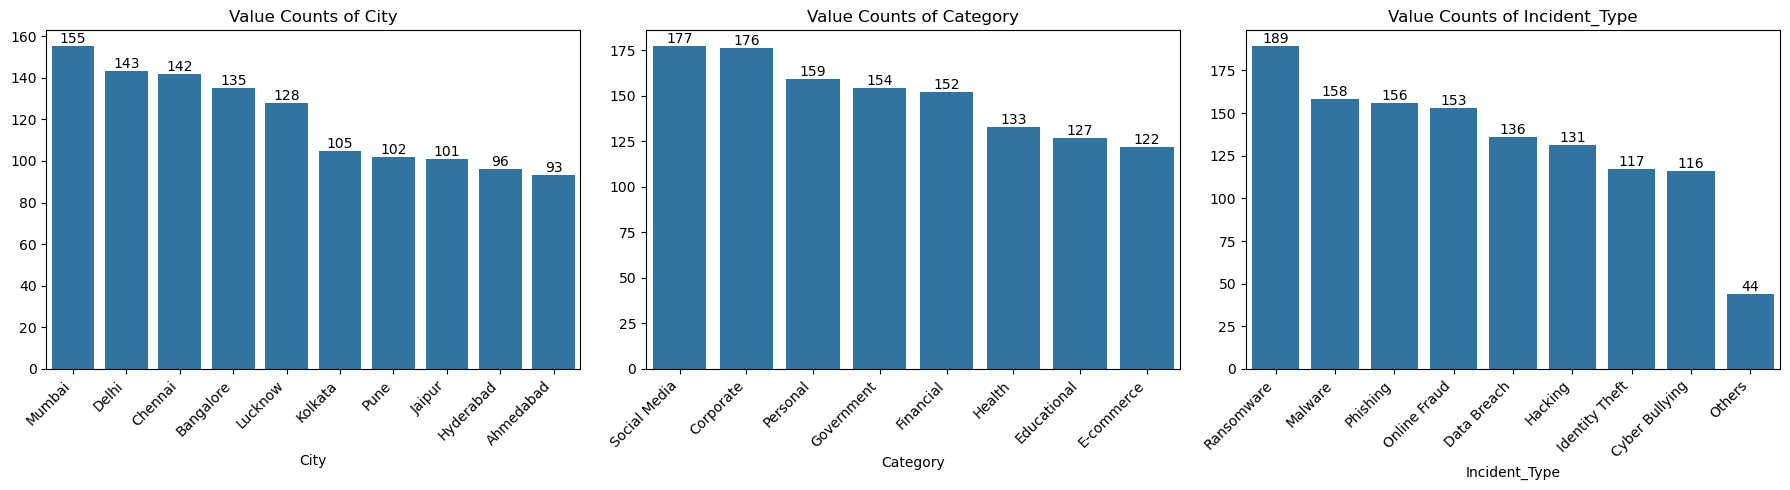

In [182]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(cats):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    axes[i].set_title(f'Value Counts of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add data labels on top of bars
    for j, value in enumerate(counts.values):
        axes[i].text(j, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

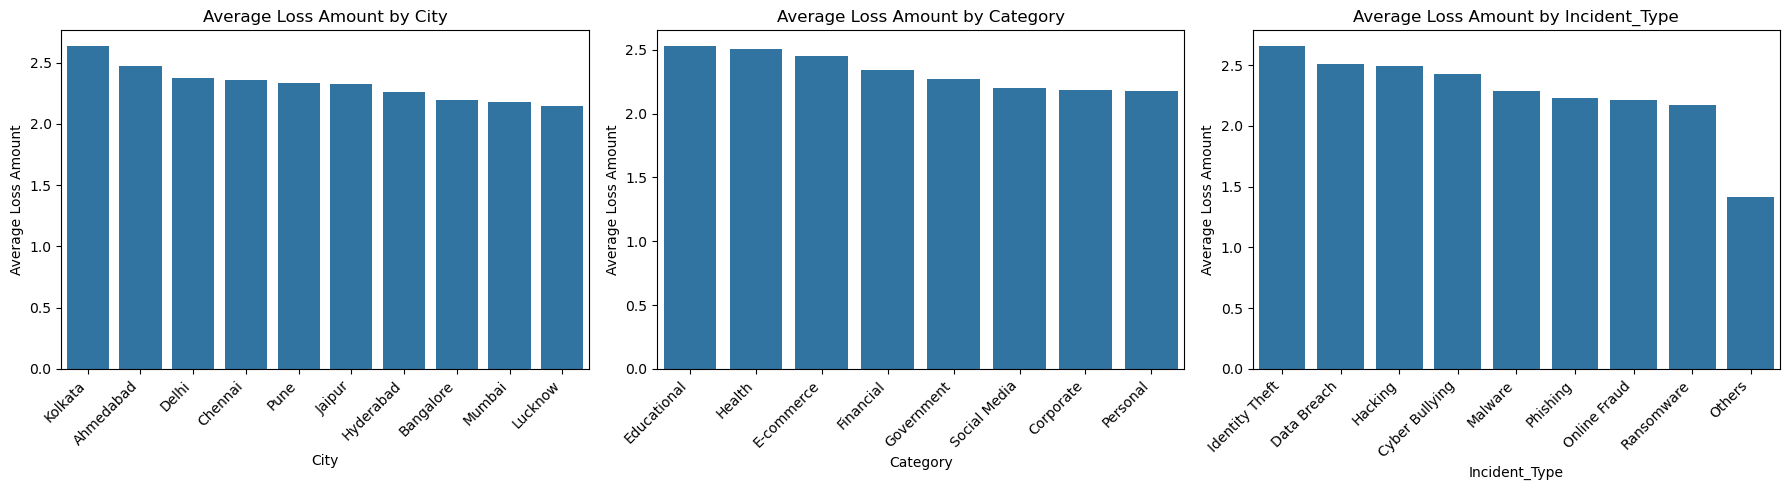

In [183]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(cats):
    # Group by category and sum the loss amount
    loss_by_cat = df.groupby(col)['Loss_in_lakhs'].mean().sort_values(ascending=False)

    sns.barplot(x=loss_by_cat.index, y=loss_by_cat.values, ax=axes[i])
    axes[i].set_title(f'Average Loss Amount by {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_ylabel('Average Loss Amount')
    axes[i].set_xlabel(col)
    
plt.tight_layout()
plt.show()

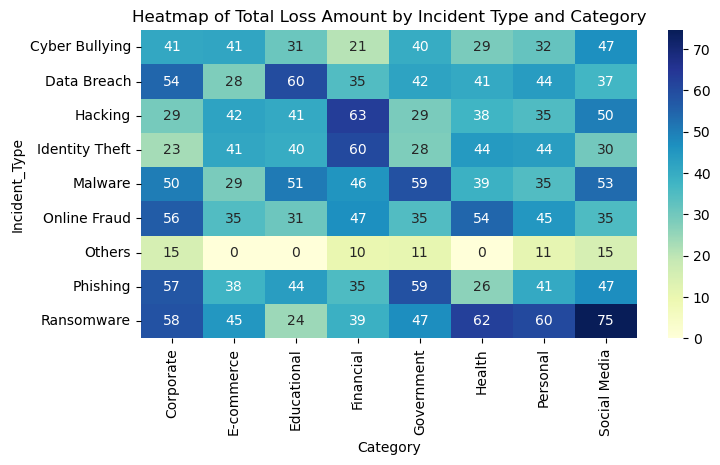

In [184]:
pivot_table = pd.pivot_table(df, 
                             values='Loss_in_lakhs', 
                             index='Incident_Type', 
                             columns='Category', 
                             aggfunc='sum',
                             fill_value=0)

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Total Loss Amount by Incident Type and Category')
plt.show()

<Axes: xlabel='Incident_Type', ylabel='City'>

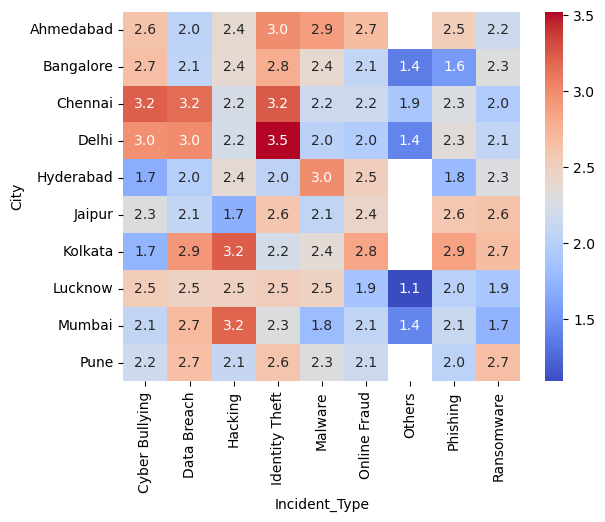

In [185]:
pivot = df.pivot_table(index='City', columns='Incident_Type', values='Loss_in_lakhs', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')

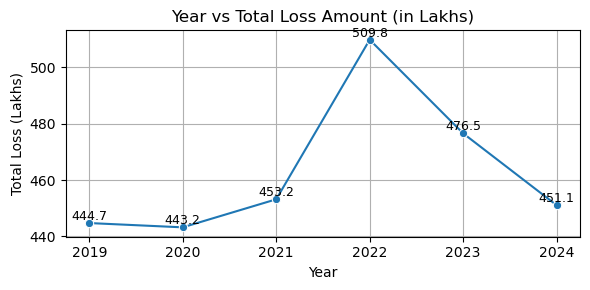

In [186]:
yearly_loss = df.groupby('Year')['Loss_in_lakhs'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(6, 3))
sns.lineplot(x='Year', y='Loss_in_lakhs', data=yearly_loss, marker='o')

# Add data labels
for i in range(len(yearly_loss)):
    plt.text(yearly_loss['Year'][i], 
             yearly_loss['Loss_in_lakhs'][i], 
             f"{yearly_loss['Loss_in_lakhs'][i]:,.1f}", 
             ha='center', va='bottom', fontsize=9)

plt.title('Year vs Total Loss Amount (in Lakhs)')
plt.xlabel('Year')
plt.ylabel('Total Loss (Lakhs)')
plt.grid(True)
plt.tight_layout()
plt.show()

Goal is to predict Loss_in_lakhs from features like Incident_Date, Incident_Type, City, Category, and Year
and dataset has only 1200 rows with categorical variables
I am using CatBoost Regressor
-> Natively handles categorical features (no need for encoding)
-> Works well on small tabular datasets
-> Reduces risk of overfitting

!pip install catboost

In [208]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['City', 'Category', 'Incident_Type', 'Year']
target = 'Loss_in_lakhs'

# Split into train/test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical feature indices
cat_features = ['City', 'Category', 'Incident_Type']

In [210]:
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_train, y_train, cat_features=cat_features)

In [212]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2.02
R² Score: -0.04


With only 1200 rows and many categories, the model not able to learn good patterns.
City, Category, Incident_Type, and Year may not explain much about the variation in Loss_in_lakhs.

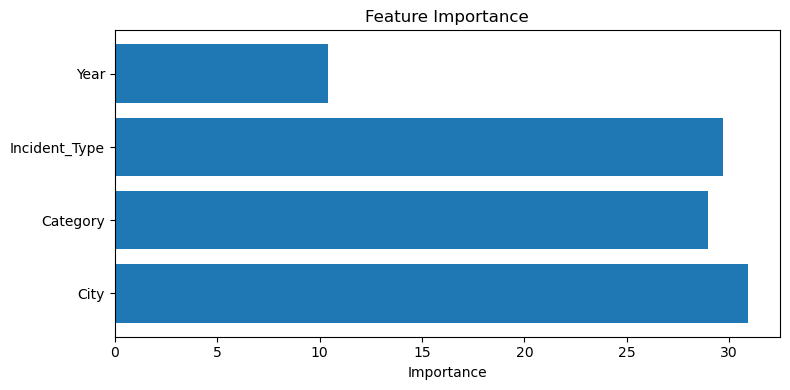

In [217]:
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

# Display as bar plot
plt.figure(figsize=(8, 4))
plt.barh(feature_names, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
Model sees all features as equally important (which is rare and usually a sign of small or uninformative data).

In [ ]:
The model considers all input features almost equally useful, or it can’t clearly distinguish which feature is more predictive.